<h1>ALY6015_SpringA2020_Team#1</h1>

<p><b>Author:</b> Pragati Koladiya, Tanvi Bhagat, Munitha Priyanka</p>
<b>Purpose:</b><i> Hackathon#3</i>


### **Supervised Machine Learning**

- In **Supervised Learning**, algorithms learn from labeled data. Supervised Learning can be divided into two categories i.e. Classification & Regression.

- **Classification:** Classification is a technique for determining class to which the dependent variable belongs to based on one or more independent variables. Classification is used for predicting discrete responses.

- **Regression:** Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.


#### For given dataset, we have used the following Supervised models:
* KNN Classifier
* Random Forests

Importing packages

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


import requests
import io
import scipy
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
from sklearn.model_selection import train_test_split  


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix  

from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
from dateutil.parser import parse
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams["figure.figsize"] = (21,7)
plt.style.use('seaborn-white')

# Load Dataset


In [2]:
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTO23yXWemT25hemJVpRGyd6NkebBsOLBtvLuK9S4_L40bdU8QDhNtO4BQ-rbs-kP9WoB7hKEFb_ZiY/pub?gid=224308430&single=true&output=csv"
df = pd.read_csv(data_path)
print(df.head(3))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1   20000.00    2          2         1   24      2      2     -1     -1   
1   2  120000.00    2          2         2   26     -1      2      0      0   
2   3   90000.00    2          2         2   34      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...       0.00       0.00       0.00      0.00    689.00      0.00   
1  ...    3272.00    3455.00    3261.00      0.00   1000.00   1000.00   
2  ...   14331.00   14948.00   15549.00   1518.00   1500.00   1000.00   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0      0.00      0.00      0.00                           1  
1   1000.00      0.00   2000.00                           1  
2   1000.00   1000.00   5000.00                           0  

[3 rows x 25 columns]


In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.00,2,2,1,24,2,2,-1,-1,...,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,...,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,...,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,...,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,...,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0


In [4]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.00,1,3,1,39,0,0,0,0,...,88004.00,31237.00,15980.00,8500.00,20000.00,5003.00,3047.00,5000.00,1000.00,0
29996,29997,150000.00,1,3,2,43,-1,-1,-1,-1,...,8979.00,5190.00,0.00,1837.00,3526.00,8998.00,129.00,0.00,0.00,0
29997,29998,30000.00,1,2,2,37,4,3,2,-1,...,20878.00,20582.00,19357.00,0.00,0.00,22000.00,4200.00,2000.00,3100.00,1
29998,29999,80000.00,1,3,1,41,1,-1,0,0,...,52774.00,11855.00,48944.00,85900.00,3409.00,1178.00,1926.00,52964.00,1804.00,1
29999,30000,50000.00,1,2,1,46,0,0,0,0,...,36535.00,32428.00,15313.00,2078.00,1800.00,1430.00,1000.00,1000.00,1000.00,1


<h1>Dataset Information</h1>
<i>There are 25 variables </i>

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [5]:
df = df.rename(columns={'default.payment.next.month': 'is_default'}, index={'ONE': 'one'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_default
0,1,20000.00,2,2,1,24,2,2,-1,-1,...,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,...,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,...,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,...,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,...,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.00,1,3,1,39,0,0,0,0,...,88004.00,31237.00,15980.00,8500.00,20000.00,5003.00,3047.00,5000.00,1000.00,0
29996,29997,150000.00,1,3,2,43,-1,-1,-1,-1,...,8979.00,5190.00,0.00,1837.00,3526.00,8998.00,129.00,0.00,0.00,0
29997,29998,30000.00,1,2,2,37,4,3,2,-1,...,20878.00,20582.00,19357.00,0.00,0.00,22000.00,4200.00,2000.00,3100.00,1
29998,29999,80000.00,1,3,1,41,1,-1,0,0,...,52774.00,11855.00,48944.00,85900.00,3409.00,1178.00,1926.00,52964.00,1804.00,1


<h3>Data Exploration</h3>

- <p>Let's first have a look at the dataset and let's try to get an essence of the information it contains.</p>

In [6]:
df.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
PAY_0         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
is_default    0
dtype: int64

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'is_default'],
      dtype='object')

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_default
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


#### As the dependent variable is categorical, we can split the distributions by "default/not-default" to look at the characteristics of the default/not-default groups.

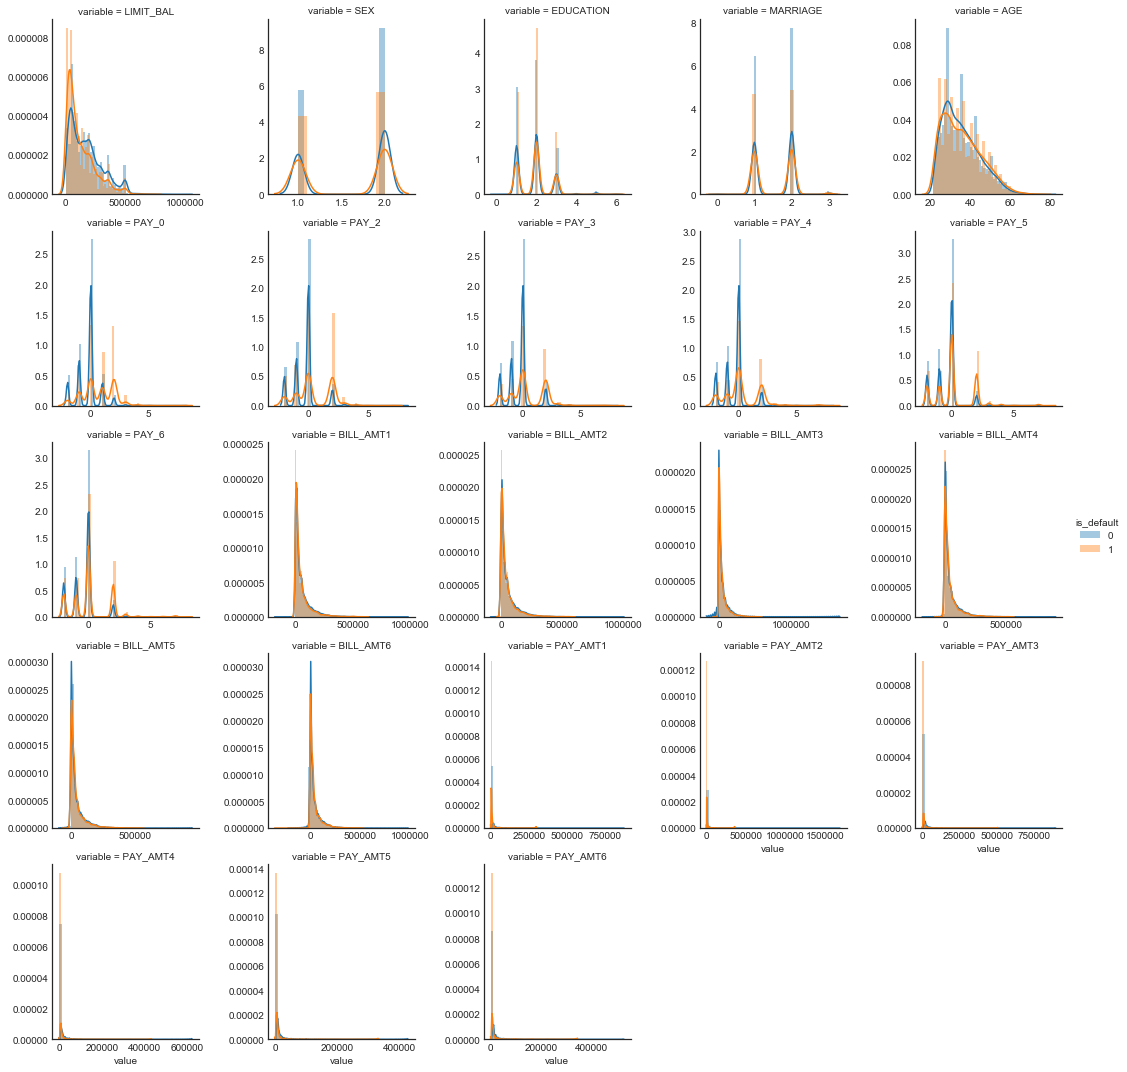

In [9]:
output = 'is_default'

# Let's do a little EDA
cols = [ f for f in df.columns if df.dtypes[ f ] != "object"]
cols.remove( "ID")
cols.remove( output )

f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

### Observations:

<ul>
    <li>Defaults have a higher proportion of Lower LIMIT_BAL values</li>
    <li>NonDefaults have a higher proportion of Females (Sex=2)</li>
<li>NonDefaults have a higher proportion of MoreEducated (EDUCATION=1 or 2)</li>
<li>NonDefaults have a higher proportion of Singles (MARRIAGE=2)</li>
<li>NonDefaults have a higher proportion of people 30-40years</li>
<li>NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables (this means that being current or ahead of payments is associated with not defaulting in the following month). This is a strong relationship as the distribution are more separated - so we expect the PAY_X to be important!</li>
    </ul>

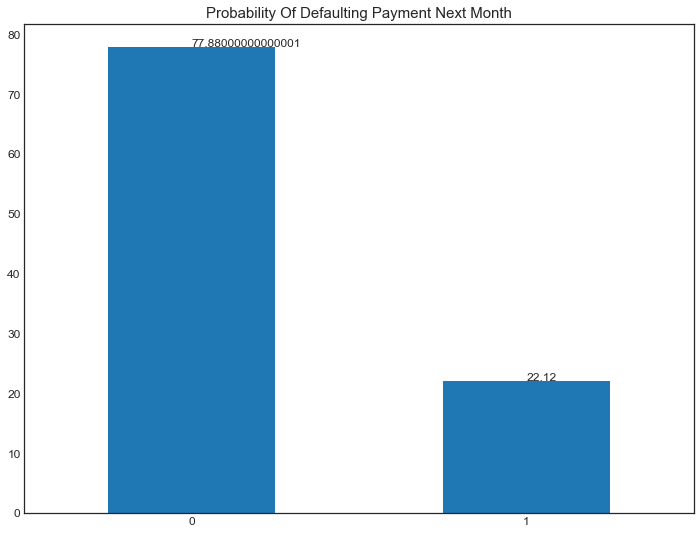

In [10]:
def_cnt = (df.is_default.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(12,9))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

#### We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment.

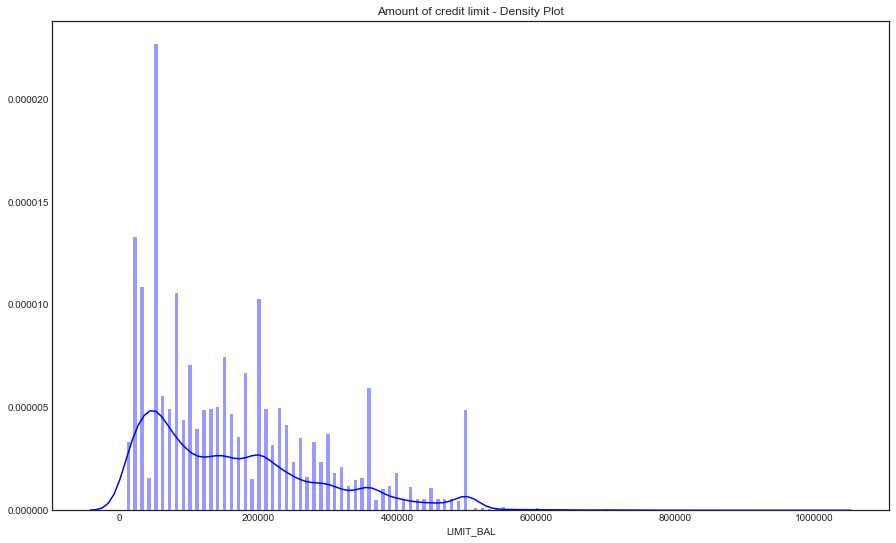

In [11]:
#Amount of credit limit
plt.figure(figsize = (15,9))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

#### Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this

In [12]:
df['LIMIT_BAL'].value_counts().shape

(81,)

#### There are 81 distinct values for amount of credit limit.

In [13]:
df['LIMIT_BAL'].value_counts().head(5)

50000.00     3365
20000.00     1976
30000.00     1610
80000.00     1567
200000.00    1528
Name: LIMIT_BAL, dtype: int64

#### Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

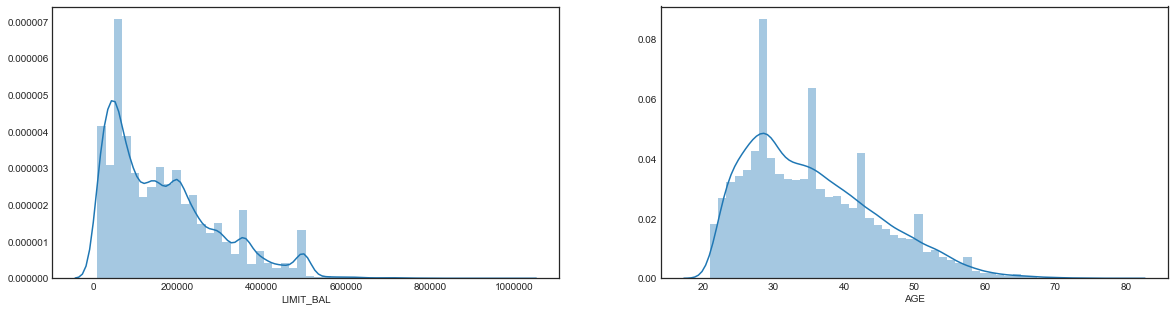

In [14]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

#### By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients. We have more number of clients having limiting balance between 0 to 200000 currency. We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.


<h1><i> Sex, Education, Age and Marriage</i></h1>

#### Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

#### Let's show sex, education, age and marriage distributions.

- We start by showing the boxplots with age distribution grouped by marriage status and sex.

### Marriage status meaning is:
- 0 : unknown (let's consider as others as well)
- 1 : married
- 2 : single
- 3 : others

### Sex meaning is:
- 1 : male
- 2 : female

In [15]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(15,9))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

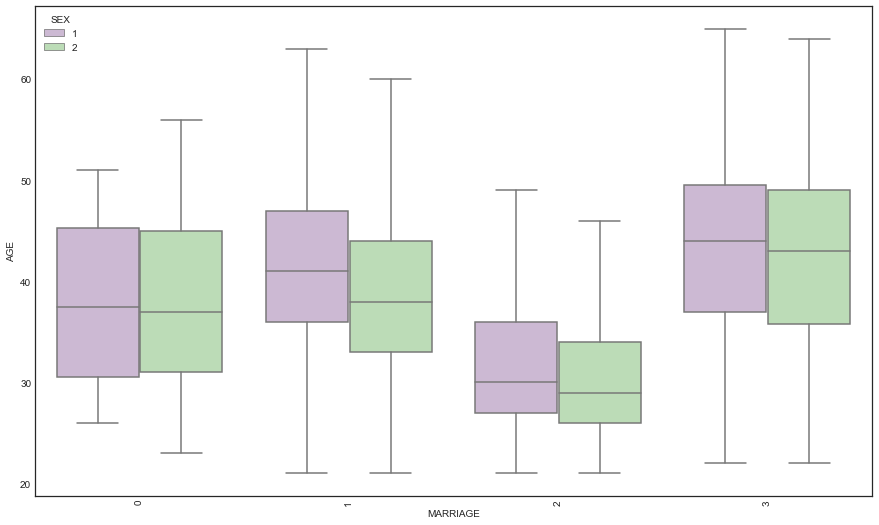

In [16]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

### It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly widowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.

### Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.

In [17]:
NUM_DELAYS = df.apply(lambda row: \
                        (1 if row.PAY_0 > 0 else 0) + \
                        (1 if row.PAY_2 > 0 else 0) + \
                        (1 if row.PAY_3 > 0 else 0) + \
                        (1 if row.PAY_4 > 0 else 0) + \
                        (1 if row.PAY_5 > 0 else 0) + \
                        (1 if row.PAY_6 > 0 else 0) \
                    , axis=1)

# Create dataframe.
df_NUM_DELAYS = pd.DataFrame(data=NUM_DELAYS, columns=["NUM_DELAYS"])
df_NUM_DELAYS.head()

,NUM_DELAYS
0,2
1,2
2,0
3,0
4,0


Text(0, 0.5, 'FREQUENCY')

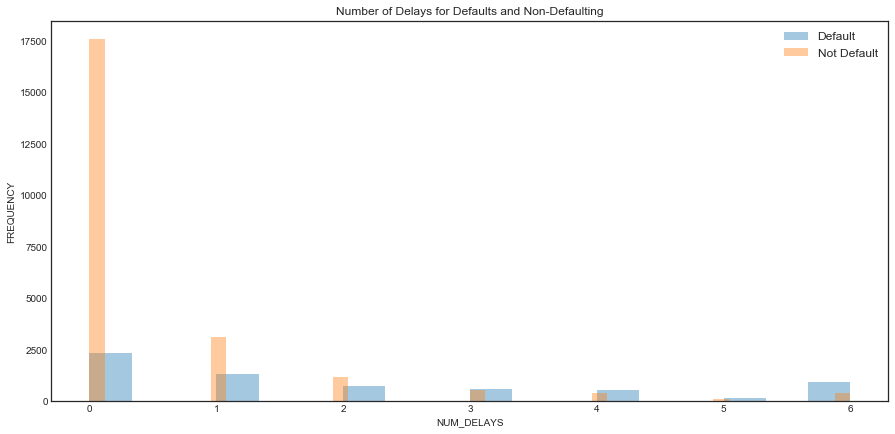

In [18]:
plt.figure(figsize=(15,7))
df_NUM_DELAYS_TARGET = pd.concat([df['is_default'],df_NUM_DELAYS], axis=1)

df_default_one = df_NUM_DELAYS_TARGET[df_NUM_DELAYS_TARGET['is_default']== 1]
sns.distplot(df_default_one['NUM_DELAYS'], kde=False, label="Default")

df_default_zero = df_NUM_DELAYS_TARGET[df_NUM_DELAYS_TARGET['is_default']== 0]
sns.distplot(df_default_zero['NUM_DELAYS'], kde=False, label="Not Default")

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Number of Delays for Defaults and Non-Defaulting')
plt.xlabel('NUM_DELAYS')
plt.ylabel('FREQUENCY')

#### According to this graph, if a customer has never defaulted, they are very likely to not default again.

### Feature Importance

[0.05900927 0.06112757 0.01335294 0.03179739 0.02270721 0.05850491
 0.08159278 0.05648637 0.04108049 0.02681541 0.02694929 0.03055638
 0.0452497  0.04220352 0.04175984 0.04140042 0.04105826 0.04162373
 0.04063158 0.03843301 0.03724    0.03806975 0.03980686 0.04254332]


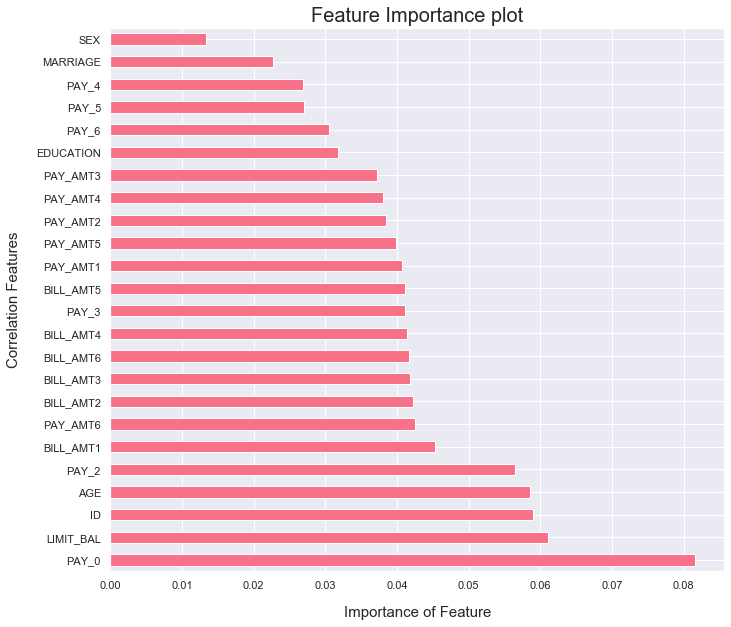

In [19]:
X =df.iloc[:,df.columns != 'is_default' ]
y =df.is_default

# feature extraction
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(11,10))
sns.set(style='whitegrid')
sns.set(palette='husl')


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')

plt.xlabel("Importance of Feature", labelpad = 15, fontsize=15)
plt.ylabel("Correlation Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

Text(0.5, 2, 'Heatmap to observe corelation between selected features and transaction ')

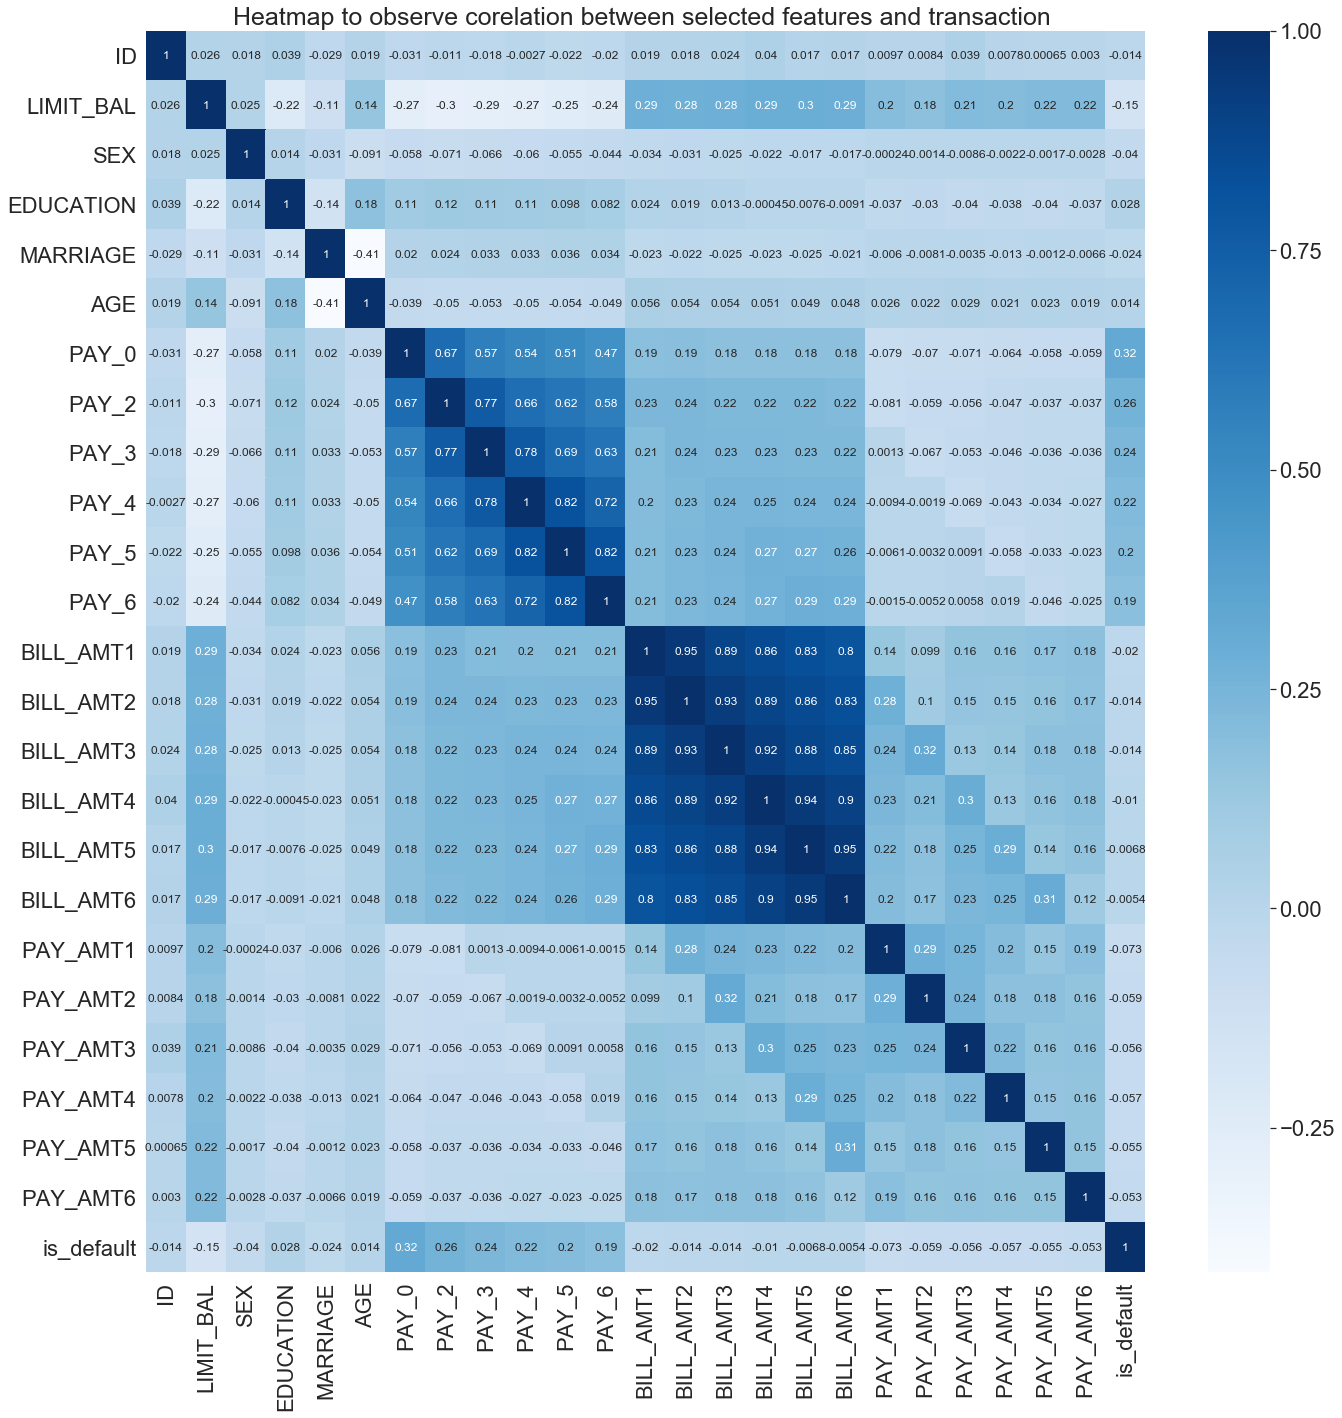

In [20]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 

sns.set(font_scale=2)
#plot heat map

ax=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues", annot_kws={"size":12})

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Heatmap to observe corelation between selected features and transaction ', y=2, fontsize=25)
#plt.title('Correlation plot',fontsize=17)

- <i>Now, set the independent variables (represented as X) and the dependent variable (represented as y):</i>

In [21]:
X =df.iloc[:,df.columns != 'is_default' ]
y =df.is_default

In [61]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.00,2,2,1,24,2,2,-1,-1,...,689.00,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00
1,2,120000.00,2,2,2,26,-1,2,0,0,...,2682.00,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00
2,3,90000.00,2,2,2,34,0,0,0,0,...,13559.00,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00
3,4,50000.00,2,2,1,37,0,0,0,0,...,49291.00,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00
4,5,50000.00,1,2,1,57,-1,0,-1,0,...,35835.00,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.00,1,3,1,39,0,0,0,0,...,208365.00,88004.00,31237.00,15980.00,8500.00,20000.00,5003.00,3047.00,5000.00,1000.00
29996,29997,150000.00,1,3,2,43,-1,-1,-1,-1,...,3502.00,8979.00,5190.00,0.00,1837.00,3526.00,8998.00,129.00,0.00,0.00
29997,29998,30000.00,1,2,2,37,4,3,2,-1,...,2758.00,20878.00,20582.00,19357.00,0.00,0.00,22000.00,4200.00,2000.00,3100.00
29998,29999,80000.00,1,3,1,41,1,-1,0,0,...,76304.00,52774.00,11855.00,48944.00,85900.00,3409.00,1178.00,1926.00,52964.00,1804.00


### Split data into Test and Train sets

In [22]:
#splitting data into training and testing subsets(70:30 ratio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

### KNN Classification

#standardization of the dataset

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [24]:
#fitting training data to the model
  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### CLassification Report 

In [25]:
#testing the model 

y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))

print(classification_report(y_test, y_pred))

0.20733333333333334
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7040
           1       0.54      0.33      0.41      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.63      0.64      9000
weighted avg       0.77      0.79      0.77      9000



### Confusion Matrix

In [26]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
print(confusion_matrix_knn)

[[6482  558]
 [1308  652]]


Text(56.5, 0.5, 'Actual label')

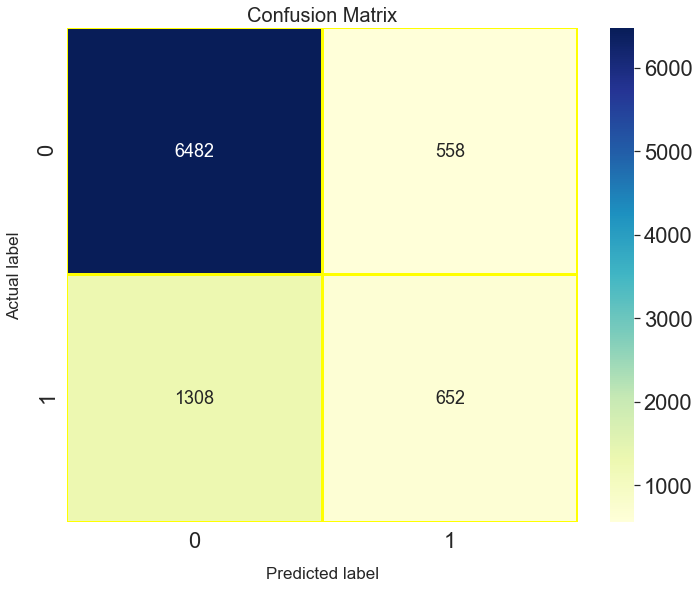

In [27]:
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix_knn),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})

#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)

#### Accuracy Score

In [28]:
print("The prediction accuracy is: ",classifier.score(X_test,y_test)*100,"%")

The prediction accuracy is:  79.26666666666667 %


#### Choosing optimum K value

In [29]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

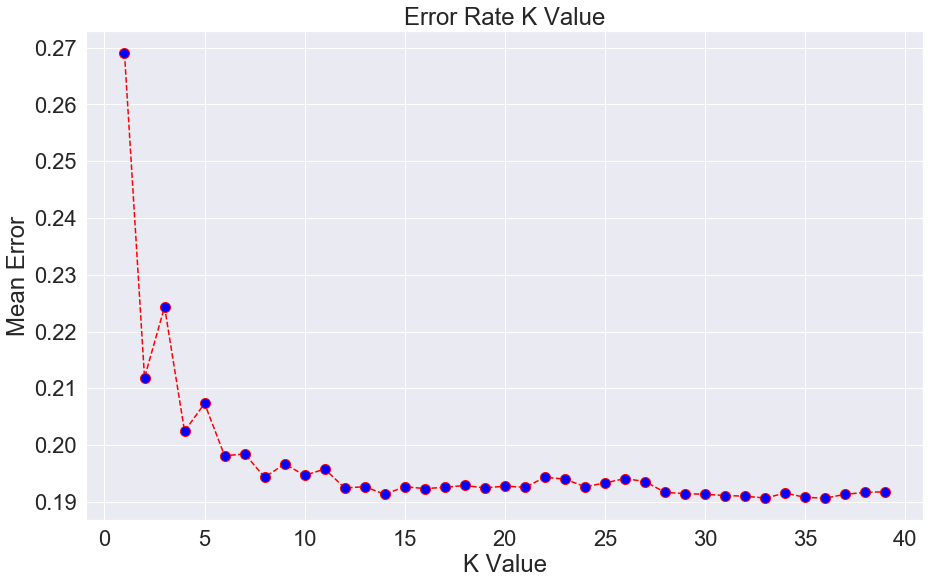

In [30]:
plt.figure(figsize=(15,9))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

#### Optimum K value is 35

In [31]:
classifier = KNeighborsClassifier(n_neighbors=35)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

#### Classification 

In [32]:
y_pred = classifier.predict(X_test)   
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7040
           1       0.64      0.29      0.40      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000



### Confusion Matrix

In [33]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6714  326]
 [1391  569]]


Text(56.5, 0.5, 'Actual label')

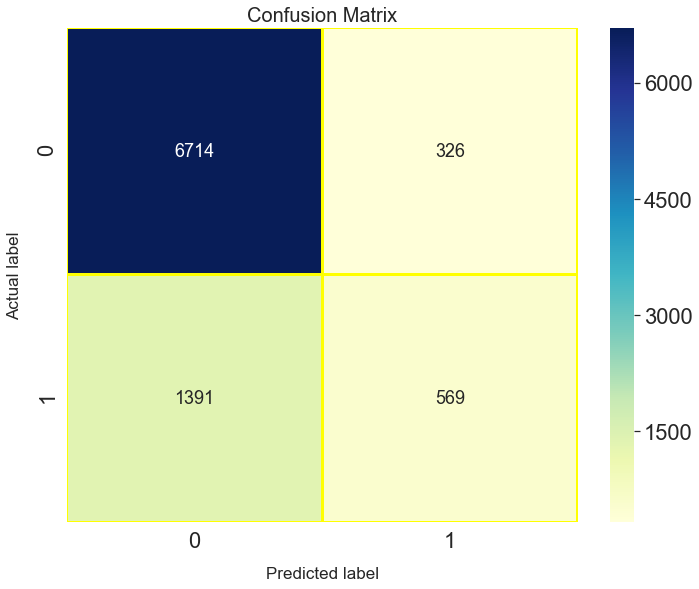

In [34]:
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix),  cmap="YlGnBu", annot=True,fmt="d", linewidths=2, linecolor='yellow',annot_kws={"size":18})

#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)

<h1>Random Forest</h1>

In [35]:
#splitting data into training and testing subsets(70:30 ratio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [38]:
classifier4 = RandomForestClassifier(n_estimators=10)
classifier4.fit( X_train, y_train )
y_pred4 = classifier4.predict( X_test )

cm4 = confusion_matrix( y_test, y_pred4 )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm4[0,0] + cm4[1,1] )/len(X_test)))
scoresRF4 = cross_val_score( classifier4, X_train, y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresRF4.mean(), scoresRF4.std() ))

Accuracy on Test Set for RandomForest = 0.81
Mean RandomForest CrossVal Train Set Accuracy Mean: 0.81 and Standard Deviation: 0.00 



In [39]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
#param_grid = {'n_estimators':np.arange(10,20,5), 'min_samples_split':np.arange(2,100,30),  'max_features': ['auto', 'sqrt', 'log2', ] }
param_grid = {'n_estimators':np.arange(10,100,20),}
param_grid

# in genreal incresing n_estimators increses the accuracy
# let see the mean_fit time vs accuracy-- time vs accuracu is the trade off

{'n_estimators': array([10, 30, 50, 70, 90])}

In [40]:
RF2 = RandomForestClassifier()
RF_n_est_cv= GridSearchCV(RF2,param_grid,cv=5)
RF_n_est_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [42]:
print('##### n_estimators from 10 to 90 ')
print(RF_n_est_cv.best_score_)
print(RF_n_est_cv.best_params_)
RF_n_est_cv.cv_results_


##### n_estimators from 10 to 90 
0.8166
{'n_estimators': 90}


{'mean_fit_time': array([1.5350914 , 3.29509745, 4.29382858, 5.41852984, 7.8474997 ]),
 'std_fit_time': array([0.24824793, 0.45487573, 0.19250299, 0.09339441, 0.67677093]),
 'mean_score_time': array([0.0355969 , 0.07526603, 0.08928018, 0.11673455, 0.22201872]),
 'std_score_time': array([0.00155561, 0.03006837, 0.00791086, 0.00598321, 0.08070336]),
 'param_n_estimators': masked_array(data=[10, 30, 50, 70, 90],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 30},
  {'n_estimators': 50},
  {'n_estimators': 70},
  {'n_estimators': 90}],
 'split0_test_score': array([0.79270122, 0.79536744, 0.80036661, 0.80436594, 0.80353274]),
 'split1_test_score': array([0.7945    , 0.80633333, 0.8065    , 0.80916667, 0.808     ]),
 'split2_test_score': array([0.80566667, 0.81733333, 0.81916667, 0.82133333, 0.82266667]),
 'split3_test_score': array([0.817     , 0.82666667, 0.82883333, 0.8295    

- Implementing two paramenters min_samples_split', 'n_estimators'

In [43]:
#In case of classifier like random the parameter to be tuned is n_neighbors
param_grid_min_samp_split  = {'n_estimators': [70], 
              'min_samples_split':np.arange(5,101,20)} 
param_grid_min_samp_split

{'n_estimators': [70], 'min_samples_split': array([ 5, 25, 45, 65, 85])}

In [44]:
RF2 = RandomForestClassifier()
RF_min_smp_cv1= GridSearchCV(RF2,param_grid_min_samp_split,cv=5)
RF_min_smp_cv1.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [45]:
print(RF_min_smp_cv1.best_score_)
print(RF_min_smp_cv1.best_params_)
RF_min_smp_cv1.cv_results_

0.8199666666666666
{'min_samples_split': 85, 'n_estimators': 70}


{'mean_fit_time': array([5.59615693, 5.6909162 , 5.12770643, 5.47261605, 5.11359777]),
 'std_fit_time': array([0.16091607, 0.67694344, 0.54918828, 0.91051709, 0.27861416]),
 'mean_score_time': array([0.12623663, 0.11326809, 0.11712427, 0.09610014, 0.09339662]),
 'std_score_time': array([0.01133222, 0.01801127, 0.04414706, 0.00768782, 0.00563624]),
 'param_min_samples_split': masked_array(data=[5, 25, 45, 65, 85],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[70, 70, 70, 70, 70],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 5, 'n_estimators': 70},
  {'min_samples_split': 25, 'n_estimators': 70},
  {'min_samples_split': 45, 'n_estimators': 70},
  {'min_samples_split': 65, 'n_estimators': 70},
  {'min_samples_split': 85, 'n_estimators': 70}],
 'split0_test_score': array([0.80553241, 0.807865

- Implementing four paramenters 'min_samples_split', 'n_estimators','max_features','max_depth'

In [46]:
#In case of classifier like random the parameter to be tuned is n_neighbors
param_grid_3 = {'n_estimators': [70],
              'min_samples_split': [65], 
              'max_features': ['auto', 'sqrt', 'log2', None ],
              'max_depth': [2, 3, 5, None] }

param_grid_3

{'n_estimators': [70],
 'min_samples_split': [65],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'max_depth': [2, 3, 5, None]}

In [47]:
RF2 = RandomForestClassifier()
RF_3_cv= GridSearchCV(RF2,param_grid_3,cv=5)
RF_3_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
print(RF_3_cv.best_score_)
print(RF_3_cv.best_params_)
RF_3_cv.cv_results_

0.8207666666666666
{'max_depth': 5, 'max_features': None, 'min_samples_split': 65, 'n_estimators': 70}


{'mean_fit_time': array([ 1.01959395,  0.99763012,  0.98156939,  3.90821428,  1.25882258,
         1.2329196 ,  1.41591387,  6.35677519,  2.17262678,  1.98713779,
         1.94119425, 10.93849292,  5.03374457,  5.72705522,  5.84909368,
        49.33010874]),
 'std_fit_time': array([ 0.10971855,  0.03374278,  0.03202477,  0.16896563,  0.04396773,
         0.02534982,  0.12808499,  0.60215995,  0.22407407,  0.14228606,
         0.10968444,  1.80670545,  0.18887656,  1.15169848,  0.77199602,
        10.55435064]),
 'mean_score_time': array([0.05043607, 0.03910217, 0.03842177, 0.03535643, 0.03963976,
        0.04110947, 0.05081987, 0.05213404, 0.06451402, 0.04730487,
        0.05137339, 0.04738822, 0.09296722, 0.11206613, 0.12504559,
        0.14729314]),
 'std_score_time': array([0.01707578, 0.00357573, 0.00383506, 0.00138259, 0.0020104 ,
        0.00480919, 0.01363885, 0.02289708, 0.01165394, 0.00459137,
        0.00741757, 0.00437628, 0.00219905, 0.02606335, 0.06927186,
        0.039473

In [49]:
#pd.concat([pd.DataFrame(RF_pr_1.cv_results_["params"]),pd.DataFrame(RF_pr_1.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
#RF_pr_1.cv_results_['params']
#pd

In [50]:
classifier_rf_01 = RandomForestClassifier(n_estimators=70, min_samples_split =65)
classifier_rf_01.fit( X_train, y_train )
y_pred_rf_01 = classifier_rf_01.predict( X_test )

cm_rf_01 = confusion_matrix( y_test, y_pred_rf_01 )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm_rf_01[0,0] + cm_rf_01[1,1] )/len(X_test)))
scoresRF4 = cross_val_score( classifier_rf_01, X_train, y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.5f and Standard Deviation: %.5f \n" % (scoresRF4.mean(), scoresRF4.std() ))

print(classification_report(y_test,y_pred_rf_01))

Accuracy on Test Set for RandomForest = 0.82
Mean RandomForest CrossVal Train Set Accuracy Mean: 0.81981 and Standard Deviation: 0.00029 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.65      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



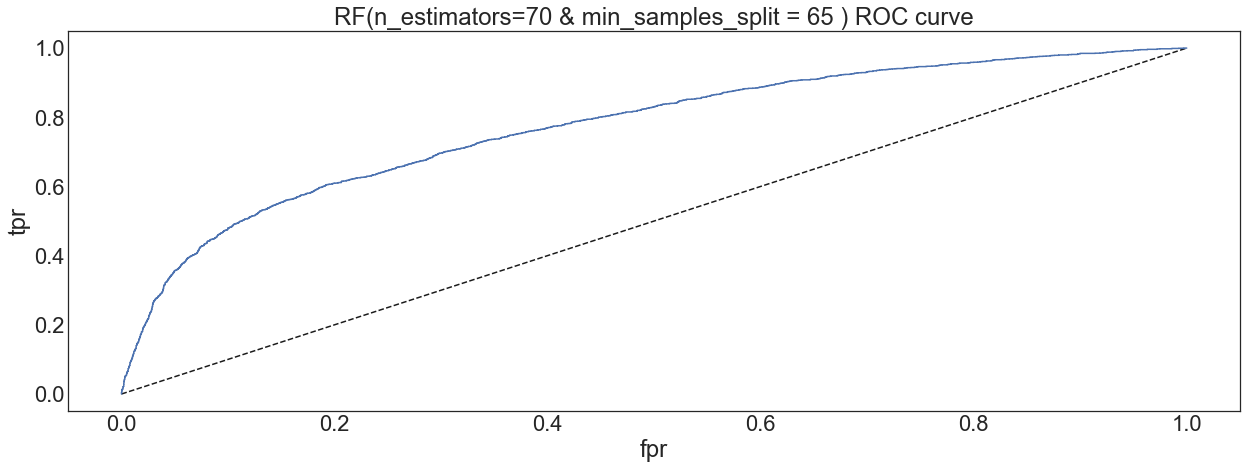

In [51]:
y_pred_proba_rf_01 = classifier_rf_01.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf_01)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RandomForestClassifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('RF(n_estimators=70 & min_samples_split = 65 ) ROC curve')
plt.show()

In [52]:
roc_auc_score(y_test,y_pred_proba_rf_01)

0.7729183093692021

In [53]:
classifier_rf_02 = RandomForestClassifier(n_estimators=70, min_samples_split =65,max_depth = 5,max_features =  None)  
classifier_rf_02.fit( X_train, y_train )
y_pred_rf_02 = classifier_rf_02.predict( X_test )

cm_rf_02 = confusion_matrix( y_test, y_pred_rf_02 )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm_rf_01[0,0] + cm_rf_01[1,1] )/len(X_test)))
scoresRF4 = cross_val_score( classifier_rf_02, X_train, y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.5f and Standard Deviation: %.5f \n" % (scoresRF4.mean(), scoresRF4.std() ))

print(classification_report(y_test,y_pred_rf_01))

Accuracy on Test Set for RandomForest = 0.82
Mean RandomForest CrossVal Train Set Accuracy Mean: 0.82057 and Standard Deviation: 0.00067 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.65      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



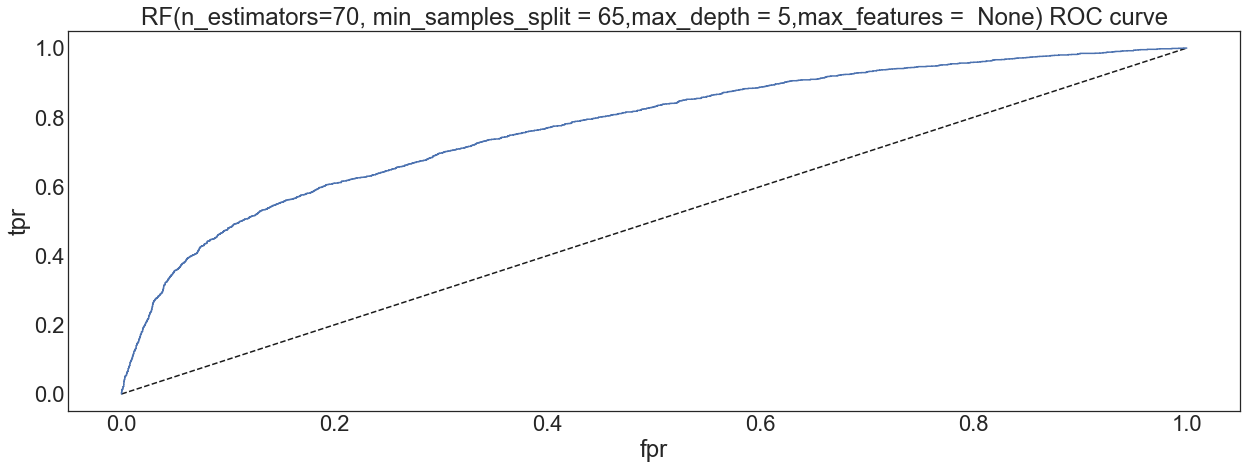

In [54]:
y_pred_proba_rf_02 = classifier_rf_02.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf_01)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RandomForestClassifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('RF(n_estimators=70, min_samples_split = 65,max_depth = 5,max_features =  None) ROC curve')
plt.show()

In [66]:
roc_auc_score(y_test,y_pred_proba_rf_02)

0.7656424295570501

#### Generating the arbitary values 

In [62]:
# Random samples and fetching the new data from the google sheets
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRzAuXcbtx13RqUgWzmtFWZkW60w03M5WSNgWVnRxikruog0zNM1TAAfIEL08aQYy_-W0_1QCQ_a-ek/pub?gid=0&single=true&output=csv'
df_arb = pd.read_csv(data_path)
df_arb

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,7,500000.00,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
1,8,100000.00,2,2,2,23,0,-1,-1,0,...,601,221,-159,567,380,601,0,581,1687,1542
2,9,140000.00,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,10,20000.00,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,11,200000.00,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66
5,12,260000.00,2,1,2,51,-1,-1,-1,-1,...,9966,8517,22287,13668,21818,9966,8583,22301,0,3640


In [63]:
# To classify the region of all columns except transaction
#Taking all columns except the main variable transaction
X_rnd_samp = df_arb

y_rnd_samp_pred = classifier4.predict(X_rnd_samp)

In [64]:
# To combine the data along with the prediction values for a clear view

prediction_rnd_samp_df = pd.DataFrame(classifier4.predict(X_rnd_samp), columns = {'Prediction'}).set_index([pd.Index(X_rnd_samp.index)])
probability_rnd_samp_df = pd.DataFrame(classifier4.predict_proba(X_rnd_samp)).set_index([pd.Index(X_rnd_samp.index)])
all_rnd_samp_df = X_rnd_samp.join(prediction_rnd_samp_df).join(probability_rnd_samp_df)
all_rnd_samp_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prediction,0,1
0,7,500000.00,1,1,2,29,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,0.50,0.50
1,8,100000.00,2,2,2,23,0,-1,-1,0,...,567,380,601,0,581,1687,1542,0,0.60,0.40
2,9,140000.00,2,3,1,28,0,0,2,0,...,3719,3329,0,432,1000,1000,1000,0,0.80,0.20
3,10,20000.00,1,3,2,35,-2,-2,-2,-2,...,13912,0,0,0,13007,1122,0,0,0.80,0.20
4,11,200000.00,2,3,2,34,0,0,2,0,...,3731,2306,12,50,300,3738,66,0,0.90,0.10
5,12,260000.00,2,1,2,51,-1,-1,-1,-1,...,13668,21818,9966,8583,22301,0,3640,0,1.00,0.00


### Observations

- <p>From the above prediction table we can observe that the people who are not married(single) 
    have more than 50% prdiction that they will not to default. </p>
- <p>The probability of people who will be defaulters is less than 50%. </p>


### Comparison of all the implemented models 

<p><b>KNN: </b></p>
    <ul>
        <li>Accuracy: 79%</li>
        <li>f1-score: 79%</li>
    </ul>
<p>After optimizing k value</p>
<ul>
    <li>Accuracy: 81%</li>
</ul>
<p><b>Random Forest: </b></p>
    <ul>Model 1: By implementing parameters min_samples_split': 65, 'n_estimators': 70
        <li>Accuracy: 82%</li>
        <li>ROC: 77%</li>
    </ul>
<ul>Model 2:'max_depth': 5, 'max_features': None, 'min_samples_split': 65, 'n_estimators': 70
    <li>Accuracy: 82%</li>
    <li>ROC: 76%</li>
</ul>